<img src="https://raw.githubusercontent.com/PriyeshGosai/pypsa-meets-earth-lab-2025/main/img/top-banner.png" alt="Top Banner" width="100%">

<div style="display: flex; align-items: center; justify-content: space-between; gap: 30px;">
  <div>
    <h3 style="margin-top: 0;">Session Instructor</h3>
    <p style="margin: 5px 0; font-size: 20px;"><strong>Priyesh Gosai</strong></p>
    <p style="margin: 2px 0; font-size: 14px;">PAS-SA • Director: Energy Solutions</p>
    <hr style="margin: 12px 0; border: none; border-top: 1px solid #000000ff;">
    <p style="margin: 6px 0; font-size: 13px;"><a href="mailto:pgosai@pas-sa.co.za">pgosai@pas-sa.co.za</a></p>
    <p style="margin: 6px 0; font-size: 13px;"><a href="https://www.linkedin.com/in/gosaip/">LinkedIn</a> | <a href="https://github.com/PriyeshGosai">GitHub</a> | <a href="https://www.pas-sa.co.za">Website</a></p>
  </div>
  <div>
    <a href="https://pas-sa.co.za/">
      <img src="https://raw.githubusercontent.com/PriyeshGosai/pypsa-meets-earth-lab-2025/main/img/pas-sa-logo.png" width="160" alt="PAS-SA">
    </a>
  </div>
</div>

# **Part 1: Getting started with PyPSA**



## Prepare Google Colab Environment

In [1]:
import os

#@title Install Packages {display-mode:"form"}
INSTALL_PACKAGES = True #@param {type:"boolean"}

# Check if packages have already been installed in this session to prevent re-installation
if INSTALL_PACKAGES and not os.environ.get('PYPSA_PACKAGES_INSTALLED'):
  !pip install pypsa pypsa[excel] folium mapclassify cartopy
  os.environ['PYPSA_PACKAGES_INSTALLED'] = 'true'
elif not INSTALL_PACKAGES:
  print("Skipping package installation.")
else:
  print("PyPSA packages are already installed for this session.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 89.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.3/153.3 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.4/103.4 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 94.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 91.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 933.6/933.6 kB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 77.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 71.2 MB/s eta 0:00:00


# Exercise 1:

**Objective:**

Programatically build a PyPSA network, define the model’s constraints, solve it, and review the results.

**Diagram**

<img src="https://raw.githubusercontent.com/PriyeshGosai/pypsa-meets-earth-lab-2025/main/img/example_1_img.png" alt="Example 1" width="50%">

**Steps**
1. Create the network object

In [2]:
import pypsa
import pandas as pd
pypsa.options.api.new_components_api = True

n = pypsa.Network()

n.add('Carrier','gas')
n.add('Carrier','AC')
n.add('Bus','Location',carrier = 'AC')
n.add('Load','Load A',bus = 'Location',p_set = 100,carrier = 'gas')
n.add('Generator','Generator A',bus = 'Location', p_nom = 500, marginal_cost = 1,p_nom_extendable = True)
n.set_snapshots(pd.date_range('2025-01-01', '2025-12-31 23:00', freq='h'))


2. Use the add method to add components.
3. Prepare the snapshots for a single investment period with an hourly resolution.

In [3]:
n.generators.static.p_nom_opt

,p_nom_opt
name,
Generator A,0.0


4. Observe components stored as Pandas dataframes

In [4]:
n.generators.static

,bus,control,type,p_nom,p_nom_mod,p_nom_extendable,p_nom_min,p_nom_max,p_nom_set,p_min_pu,...,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,weight,p_nom_opt
name,,,,,,,,,,,,,,,,,,,,,
Generator A,Location,PQ,,500.0,0.0,True,0.0,inf,NaN,0.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0


In [5]:
n.snapshots

DatetimeIndex(['2025-01-01 00:00:00', '2025-01-01 01:00:00',
               '2025-01-01 02:00:00', '2025-01-01 03:00:00',
               '2025-01-01 04:00:00', '2025-01-01 05:00:00',
               '2025-01-01 06:00:00', '2025-01-01 07:00:00',
               '2025-01-01 08:00:00', '2025-01-01 09:00:00',
               ...
               '2025-12-31 14:00:00', '2025-12-31 15:00:00',
               '2025-12-31 16:00:00', '2025-12-31 17:00:00',
               '2025-12-31 18:00:00', '2025-12-31 19:00:00',
               '2025-12-31 20:00:00', '2025-12-31 21:00:00',
               '2025-12-31 22:00:00', '2025-12-31 23:00:00'],
              dtype='datetime64[ns]', name='snapshot', length=8760, freq='h')

In [6]:
n.loads.static

,bus,carrier,type,p_set,q_set,sign,active
name,,,,,,,
Load A,Location,gas,,100.0,0.0,-1.0,True


In [7]:
n.buses.static

,v_nom,type,x,y,carrier,unit,location,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,control,generator,sub_network
name,,,,,,,,,,,,,
Location,1.0,,0.0,0.0,AC,,,1.0,0.0,inf,PQ,,


5. Build the full optimisation model (variables, constraints, objective).

In [8]:
n.optimize.create_model()

Linopy LP model

Variables:
----------
 * Generator-p_nom (name)
 * Generator-p (snapshot, name)

Constraints:
------------
 * Generator-ext-p_nom-lower (name)
 * Generator-ext-p-lower (snapshot, name)
 * Generator-ext-p-upper (snapshot, name)
 * Bus-nodal_balance (name, snapshot)

Status:
-------
initialized

6. Pass that model to the solver and gets the results.

In [9]:
n.optimize.solve_model()


('ok', 'optimal')

We can also run both steps in sequence.

Therefore:

```

n.optimize()

```

is the same as:


```

n.create_model()

n.solve_model()

```








7. Observe the results using the methods from pandas.

* `plot()`
* `describe()`
* `sum()`

Since we are using the new api, we need to call is as follows:

`n.generators.dynamic.p.plot()`

In [10]:
n.generators.static

,bus,control,type,p_nom,p_nom_mod,p_nom_extendable,p_nom_min,p_nom_max,p_nom_set,p_min_pu,...,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,weight,p_nom_opt
name,,,,,,,,,,,,,,,,,,,,,
Generator A,Location,Slack,,500.0,0.0,True,0.0,inf,NaN,0.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,100.0


In [11]:
n.objective_constant

0.0

In [12]:
n.buses.dynamic.marginal_price.sum()

,0
name,
Location,8760.0


In [13]:
n.snapshot_weightings

,objective,stores,generators
snapshot,,,
2025-01-01 00:00:00,1.0,1.0,1.0
2025-01-01 01:00:00,1.0,1.0,1.0
2025-01-01 02:00:00,1.0,1.0,1.0
2025-01-01 03:00:00,1.0,1.0,1.0
2025-01-01 04:00:00,1.0,1.0,1.0
...,...,...,...
2025-12-31 19:00:00,1.0,1.0,1.0
2025-12-31 20:00:00,1.0,1.0,1.0
2025-12-31 21:00:00,1.0,1.0,1.0


In [50]:
n.objective

876000.0

In [15]:
for key in n.buses.dynamic:
    print(key)

v_mag_pu_set
p
q
v_mag_pu
v_ang
marginal_price


In [16]:
n.loads

'Load' Components
-----------------
Attached to PyPSA Network 'Unnamed Network'
Components: 1

In [17]:
n.objective

876000.0

Generator Results
The total power generated over the period for all generators: 876000.0
describe()
name   Generator A
count       8760.0
mean         100.0
std            0.0
min          100.0
25%          100.0
50%          100.0
75%          100.0
max          100.0


<Axes: xlabel='snapshot'>

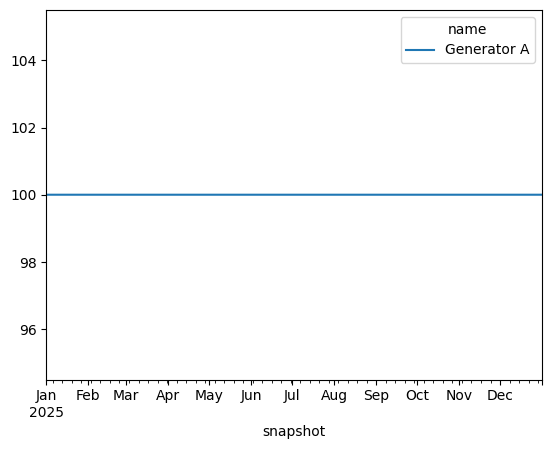

In [18]:
print('='*60)
print('Generator Results')
print('='*60)
print(f'The total power generated over the period for all generators: {n.generators.dynamic.p.sum().sum()}')
print('describe()')
print(n.generators.dynamic.p.describe())
n.generators.dynamic.p.plot()

Bus Results


<Axes: xlabel='snapshot'>

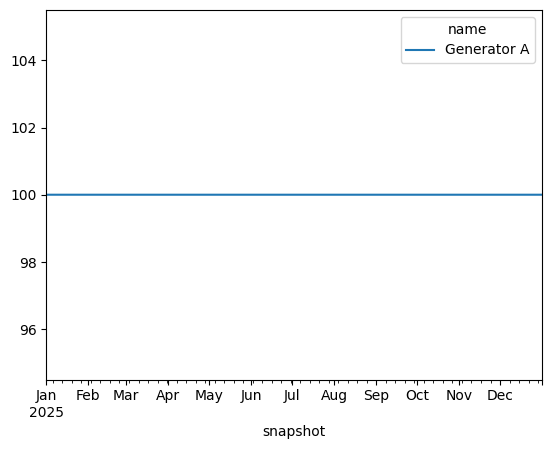

In [19]:
print('='*60)
print('Bus Results')
print('='*60)

n.generators.dynamic.p.plot()

# Example 2:

In this example, we will use an example network distributed with PyPSA to observe more complex features.



This example demonstrates how to optimise meshed AC-DC networks in PyPSA. The example has a 3-node AC network coupled via AC-DC converters to a 3-node DC network. There is also a single point-to-point DC connection using the Link component.


[Meshed AC-DC Network Example](https://docs.pypsa.org/latest/examples/ac-dc-lopf/)

In [20]:
import pypsa
pypsa.options.api.new_components_api = True

network = pypsa.examples.ac_dc_meshed()

In [52]:
network.carriers.static

,co2_emissions,color,nice_name,max_growth,max_relative_growth,marginal_cost,efficiency,capital_cost
name,,,,,,,,
gas,0.24,red,,inf,0.0,0.0,1.0,0.0
wind,0.00,blue,,inf,0.0,0.0,1.0,0.0
battery,0.00,green,,inf,0.0,0.0,1.0,0.0
load,0.00,black,,inf,0.0,NaN,NaN,NaN
AC,0.00,orange,,inf,0.0,NaN,NaN,NaN
DC,0.00,purple,,inf,0.0,NaN,NaN,NaN


In [54]:
network.global_constraints.static

,type,investment_period,bus,carrier_attribute,sense,constant,mu
name,,,,,,,
co2_limit,primary_energy,NaN,,co2_emissions,<=,1000.0,-2178.291799


In [55]:
network.generators.static.efficiency

,efficiency
name,
Manchester Wind,1.000000
Manchester Gas,0.350026
Norway Wind,1.000000
Norway Gas,0.356836
Frankfurt Wind,1.000000
Frankfurt Gas,0.351666


In [56]:
network.generators.static.p_nom_extendable

,p_nom_extendable
name,
Manchester Wind,True
Manchester Gas,True
Norway Wind,True
Norway Gas,True
Frankfurt Wind,True
Frankfurt Gas,True


In [57]:
network.generators.static

,bus,control,type,p_nom,p_nom_mod,p_nom_extendable,p_nom_min,p_nom_max,p_nom_set,p_min_pu,...,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,weight,p_nom_opt
name,,,,,,,,,,,,,,,,,,,,,
Manchester Wind,Manchester,Slack,,80.0,0.0,True,100.0,inf,NaN,0.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,4090.809778
Manchester Gas,Manchester,PQ,,50000.0,0.0,True,0.0,inf,NaN,0.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,-0.000000
Norway Wind,Norway,Slack,,100.0,0.0,True,100.0,inf,NaN,0.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,1533.599858
Norway Gas,Norway,PQ,,20000.0,0.0,True,0.0,inf,NaN,0.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,-0.000000
Frankfurt Wind,Frankfurt,Slack,,110.0,0.0,True,100.0,inf,NaN,0.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,1667.724420
Frankfurt Gas,Frankfurt,PQ,,80000.0,0.0,True,0.0,inf,NaN,0.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,982.034483


In [58]:
network.static.links

AttributeError: 'function' object has no attribute 'links'

View the network on a map

In [59]:
line_color = network.lines.static.bus0.map(network.buses.static.carrier).map(
    lambda ct: "r" if ct == "DC" else "b"
)

network.plot.explore(
    line_color=line_color,
    link_color="c",
    jitter=0.4,
)

<IPython.core.display.Javascript object>

{
  "initialViewState": {
    "bearing": 0,
    "latitude": 54.05297873762513,
    "longitude": 5.3155101231807995,
    "pitch": 0,
    "zoom": 4
  },
  "layers": [
    {
      "@@type": "PathLayer",
      "autoHighlight": true,
      "data": [
        {
          "bus0": "Norwich",
          "bus1": "Norwich DC",
          "color": "c",
          "name": "Norwich Converter",
          "path": [
            [
              1.4432081229146085,
              52.759909308862504
            ],
            [
              1.2065155259167595,
              52.44962972102627
            ]
          ],
          "rgba": [
            0,
            191,
            191,
            230
          ],
          "tooltip_html": "<b>Norwich Converter</b>\n<table>\n<tr><td style='font-weight:bold'>bus0:</td><td style='text-align:left'>Norwich</td></tr>\n<tr><td style='font-weight:bold'>bus1:</td><td style='text-align:left'>Norwich DC</td></tr>\n<tr><td style='font-weight:bold'>color:</td><td style='text-align:left'>c</td></tr>\n<tr><td style='font-weight:bold'>width:</td><td style='text-align:left'>2</td></tr>\n</table>",
          "width": 2,
          "width_pdk": 2000.0
        },
        {
          "bus0": "Norway",
          "bus1": "Norway DC",
          "color": "c",
          "name": "Norway Converter",
          "path": [
            [
              10.831027428662734,
              60.35268421163746
            ],
            [
              10.624719906413274,
              60.13521863837116
            ]
          ],
          "rgba": [
            0,
            191,
            191,
            230
          ],
          "tooltip_html": "<b>Norway Converter</b>\n<table>\n<tr><td style='font-weight:bold'>bus0:</td><td style='text-align:left'>Norway</td></tr>\n<tr><td style='font-weight:bold'>bus1:</td><td style='text-align:left'>Norway DC</td></tr>\n<tr><td style='font-weight:bold'>color:</td><td style='text-align:left'>c</td></tr>\n<tr><td style='font-weight:bold'>width:</td><td style='text-align:left'>2</td></tr>\n</table>",
          "width": 2,
          "width_pdk": 2000.0
        },
        {
          "bus0": "Bremen",
          "bus1": "Bremen DC",
          "color": "c",
          "name": "Bremen Converter",
          "path": [
            [
              8.971200805699661,
              53.178747385716115
            ],
            [
              8.946663832607324,
              52.73380409422405
            ]
          ],
          "rgba": [
            0,
            191,
            191,
            230
          ],
          "tooltip_html": "<b>Bremen Converter</b>\n<table>\n<tr><td style='font-weight:bold'>bus0:</td><td style='text-align:left'>Bremen</td></tr>\n<tr><td style='font-weight:bold'>bus1:</td><td style='text-align:left'>Bremen DC</td></tr>\n<tr><td style='font-weight:bold'>color:</td><td style='text-align:left'>c</td></tr>\n<tr><td style='font-weight:bold'>width:</td><td style='text-align:left'>2</td></tr>\n</table>",
          "width": 2,
          "width_pdk": 2000.0
        },
        {
          "bus0": "London",
          "bus1": "Bremen",
          "color": "c",
          "name": "DC link",
          "path": [
            [
              0.05461983558629757,
              51.15166538879106
            ],
            [
              8.971200805699661,
              53.178747385716115
            ]
          ],
          "rgba": [
            0,
            191,
            191,
            230
          ],
          "tooltip_html": "<b>DC link</b>\n<table>\n<tr><td style='font-weight:bold'>bus0:</td><td style='text-align:left'>London</td></tr>\n<tr><td style='font-weight:bold'>bus1:</td><td style='text-align:left'>Bremen</td></tr>\n<tr><td style='font-weight:bold'>color:</td><td style='text-align:left'>c</td></tr>\n<tr><td style='font-weight:bold'>width:</td><td style='text-align:left'>2</td></tr>\n</table>",
          "width": 2,
          "width_pdk": 2000.0
        }
      ],
      "getColor"

View all the components in the network

In [60]:
network.determine_network_topology()


PyPSA Network 'AC-DC-Meshed'
----------------------------
Components:
 - Bus: 9
 - Carrier: 6
 - Generator: 6
 - GlobalConstraint: 1
 - Line: 7
 - Link: 4
 - Load: 6
 - SubNetwork: 4
Snapshots: 10

In [30]:
network.snapshots

DatetimeIndex(['2015-01-01 00:00:00', '2015-01-01 01:00:00',
               '2015-01-01 02:00:00', '2015-01-01 03:00:00',
               '2015-01-01 04:00:00', '2015-01-01 05:00:00',
               '2015-01-01 06:00:00', '2015-01-01 07:00:00',
               '2015-01-01 08:00:00', '2015-01-01 09:00:00'],
              dtype='datetime64[ns]', name='snapshot', freq=None)

In [31]:
network.buses.static

,v_nom,type,x,y,carrier,unit,location,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,control,generator,sub_network,country
name,,,,,,,,,,,,,,
London,380.0,,-0.13,51.50,AC,,,1.0,0.0,inf,PQ,,0,UK
Norwich,380.0,,1.30,52.60,AC,,,1.0,0.0,inf,PQ,,0,UK
Norwich DC,200.0,,1.30,52.50,DC,,,1.0,0.0,inf,Slack,,1,UK
Manchester,380.0,,-2.20,53.47,AC,,,1.0,0.0,inf,Slack,Manchester Wind,0,UK
Bremen,380.0,,8.80,53.08,AC,,,1.0,0.0,inf,PQ,,2,DE
Bremen DC,200.0,,8.80,52.98,DC,,,1.0,0.0,inf,PQ,,1,DE
Frankfurt,380.0,,8.70,50.12,AC,,,1.0,0.0,inf,Slack,Frankfurt Wind,2,DE
Norway,380.0,,10.75,60.00,AC,,,1.0,0.0,inf,Slack,Norway Wind,3,NO
Norway DC,200.0,,10.75,60.00,DC,,,1.0,0.0,inf,PQ,,1,NO


In [32]:
network.generators.static

,bus,control,type,p_nom,p_nom_mod,p_nom_extendable,p_nom_min,p_nom_max,p_nom_set,p_min_pu,...,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,weight,p_nom_opt
name,,,,,,,,,,,,,,,,,,,,,
Manchester Wind,Manchester,Slack,,80.0,0.0,True,100.0,inf,NaN,0.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
Manchester Gas,Manchester,PQ,,50000.0,0.0,True,0.0,inf,NaN,0.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
Norway Wind,Norway,Slack,,100.0,0.0,True,100.0,inf,NaN,0.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
Norway Gas,Norway,PQ,,20000.0,0.0,True,0.0,inf,NaN,0.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
Frankfurt Wind,Frankfurt,Slack,,110.0,0.0,True,100.0,inf,NaN,0.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
Frankfurt Gas,Frankfurt,PQ,,80000.0,0.0,True,0.0,inf,NaN,0.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0


Constraints applied to generators based on constraints at time steps.

e.g. Maximum solar/wind or for conventional generators that have restrictions due to cooling systems.

In [33]:
network.generators.dynamic.p_max_pu

name,Manchester Wind,Frankfurt Wind,Norway Wind
snapshot,,,
2015-01-01 00:00:00,0.930020,0.559078,0.974583
2015-01-01 01:00:00,0.485748,0.752910,0.481290
2015-01-01 02:00:00,0.233692,0.123465,0.407226
2015-01-01 03:00:00,0.257604,0.966677,0.599965
2015-01-01 04:00:00,0.626906,0.859008,0.524468
2015-01-01 05:00:00,0.603598,0.526154,0.009693
2015-01-01 06:00:00,0.678908,0.077893,0.220453
2015-01-01 07:00:00,0.361303,0.059023,0.823919
2015-01-01 08:00:00,0.621604,0.248554,0.556230


<Axes: xlabel='snapshot'>

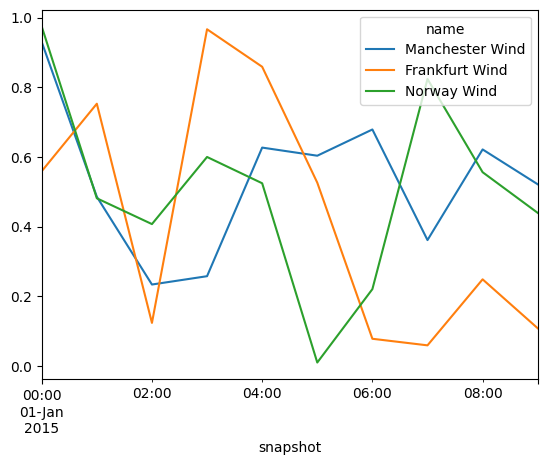

In [34]:
network.generators.dynamic.p_max_pu.plot()

In [35]:
network.lines.static

,bus0,bus1,type,x,r,g,b,s_nom,s_nom_mod,s_nom_extendable,...,v_ang_min,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu,x_pu_eff,r_pu_eff,s_nom_opt
name,,,,,,,,,,,,,,,,,,,,,
0,London,Manchester,,0.796878,0.000000,0.0,0.0,40000.0,0.0,True,...,-inf,inf,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Manchester,Norwich,,0.391560,0.000000,0.0,0.0,40000.0,0.0,True,...,-inf,inf,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Bremen DC,Norwich DC,,0.000000,0.212604,0.0,0.0,40000.0,0.0,True,...,-inf,inf,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Norwich DC,Norway DC,,0.000000,0.486164,0.0,0.0,40000.0,0.0,True,...,-inf,inf,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Norway DC,Bremen DC,,0.000000,0.428727,0.0,0.0,40000.0,0.0,True,...,-inf,inf,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Norwich,London,,0.238800,0.000000,0.0,0.0,40000.0,0.0,True,...,-inf,inf,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Bremen,Frankfurt,,0.400000,0.000000,0.0,0.0,40000.0,0.0,True,...,-inf,inf,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
network.links.static

,bus0,bus1,type,carrier,efficiency,active,build_year,lifetime,p_nom,p_nom_mod,...,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt
name,,,,,,,,,,,,,,,,,,,,,
Norwich Converter,Norwich,Norwich DC,,DC,1.0,True,0,inf,1000.0,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
Norway Converter,Norway,Norway DC,,DC,1.0,True,0,inf,1000.0,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
Bremen Converter,Bremen,Bremen DC,,DC,1.0,True,0,inf,1000.0,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
DC link,London,Bremen,,DC,1.0,True,0,inf,1000.0,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0


In [37]:
network.loads.static

,bus,carrier,type,p_set,q_set,sign,active
name,,,,,,,
London,London,load,,0.0,0.0,-1.0,True
Frankfurt,Frankfurt,load,,0.0,0.0,-1.0,True
Norway,Norway,load,,0.0,0.0,-1.0,True
Norwich,Norwich,load,,0.0,0.0,-1.0,True
Bremen,Bremen,load,,0.0,0.0,-1.0,True
Manchester,Manchester,load,,0.0,0.0,-1.0,True


Timeseries data for loads

In [38]:
network.loads.dynamic.p_set

name,London,Norwich,Frankfurt,Bremen,Norway,Manchester
snapshot,,,,,,
2015-01-01 00:00:00,35.796244,415.462564,398.047847,640.086378,820.035836,857.551440
2015-01-01 01:00:00,976.824561,262.606146,432.436106,703.554334,854.834047,750.599624
2015-01-01 02:00:00,250.587312,418.476353,379.803928,440.836130,42.550744,156.564876
2015-01-01 03:00:00,130.753145,552.959539,868.361764,612.576306,647.548233,527.870822
2015-01-01 04:00:00,151.100169,218.159858,548.770755,803.436781,884.073873,83.897759
2015-01-01 05:00:00,931.857052,791.976266,828.665243,605.400687,509.062449,676.623319
2015-01-01 06:00:00,289.848287,531.870681,449.290752,641.090590,595.607965,731.137100
2015-01-01 07:00:00,864.343322,23.513467,699.163766,408.008541,291.642450,553.344889
2015-01-01 08:00:00,689.577264,970.059068,915.866780,912.247776,2.153493,298.338082


<Axes: xlabel='snapshot'>

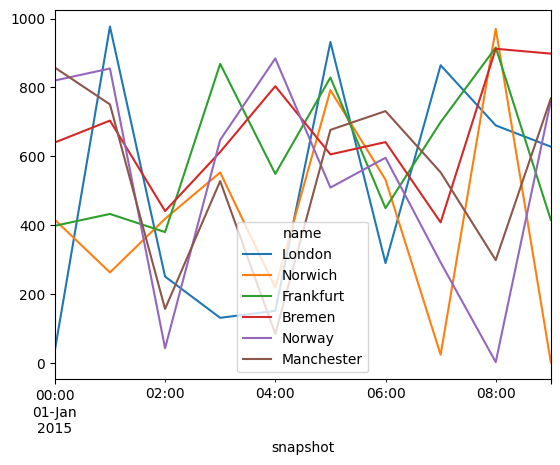

In [39]:
network.loads.dynamic.p_set.plot()

Global constraints

In [40]:
network.global_constraints.static

,type,investment_period,bus,carrier_attribute,sense,constant,mu
name,,,,,,,
co2_limit,primary_energy,NaN,,co2_emissions,<=,1000.0,0.0


Subnetworks

Sub-networks are built in the PyPSA network and provides a hierarchical way to structure your PyPSA model, making it more robust, interpretable, and flexible.



* Sub-networks in PyPSA are a powerful feature for organizing and analyzing complex energy systems.
* They represent distinct, interconnected parts of a larger network, allowing for a more structured and manageable approach to modeling and optimization.
* Sub-networks allow you to break down the network into smaller, more understandable modules. This makes the model easier to build, understand, and maintain.
* Sub-networks help in understanding the interactions and dependencies between different parts of the system. For example, you might define separate sub-networks for AC and DC grids, or for different geographical regions, and then analyze how power flows between them.
* Different sub-networks can have distinct electrical characteristics (e.g., AC vs. DC, different voltage levels) or operational rules. PyPSA's sub-network feature allows you to capture these differences accurately within a unified framework.
* For certain types of analysis, especially in optimization, dealing with smaller sub-problems can sometimes improve computational efficiency, although PyPSA generally optimizes across the entire network.


In [41]:
network.sub_networks.static

,carrier,slack_bus,obj
name,,,
0,AC,Manchester,<pypsa.networks.SubNetwork object at 0x78e1183...
1,DC,Norwich DC,<pypsa.networks.SubNetwork object at 0x78e1183...
2,AC,Frankfurt,<pypsa.networks.SubNetwork object at 0x78e1183...
3,AC,Norway,<pypsa.networks.SubNetwork object at 0x78e1187...


In [42]:
network.sub_networks.static.loc['0','obj']

In [43]:
network.sub_networks.static.loc['0','obj'].components.buses.static

,v_nom,type,x,y,carrier,unit,location,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,control,generator,sub_network,country
name,,,,,,,,,,,,,,
London,380.0,,-0.13,51.50,AC,,,1.0,0.0,inf,PQ,,0,UK
Norwich,380.0,,1.30,52.60,AC,,,1.0,0.0,inf,PQ,,0,UK
Manchester,380.0,,-2.20,53.47,AC,,,1.0,0.0,inf,Slack,Manchester Wind,0,UK


Solve the model

In [44]:
network.optimize()

Index(['2', '3', '4'], dtype='object', name='name')
Index(['0', '1', '5', '6'], dtype='object', name='name')


('ok', 'optimal')

View all the constraints

In [45]:
network.model

Linopy LP model

Variables:
----------
 * Generator-p_nom (name)
 * Line-s_nom (name)
 * Link-p_nom (name)
 * Generator-p (snapshot, name)
 * Line-s (snapshot, name)
 * Link-p (snapshot, name)
 * objective_constant

Constraints:
------------
 * Generator-ext-p_nom-lower (name)
 * Line-ext-s_nom-lower (name)
 * Link-ext-p_nom-lower (name)
 * Generator-ext-p-lower (snapshot, name)
 * Generator-ext-p-upper (snapshot, name)
 * Line-ext-s-lower (snapshot, name)
 * Line-ext-s-upper (snapshot, name)
 * Link-ext-p-lower (snapshot, name)
 * Link-ext-p-upper (snapshot, name)
 * Bus-nodal_balance (name, snapshot)
 * Kirchhoff-Voltage-Law (snapshot, cycle)
 * GlobalConstraint-co2_limit

Status:
-------
ok

View Results

/tmp/ipython-input-2960209016.py:1: DeprecationWarning:

With PyPSA 1.0, the API for how to access components data has changed. See #TODO for more information. Use `n.generators.dynamic` as a drop-in replacement for `n.generators_t`.



<Axes: xlabel='snapshot'>

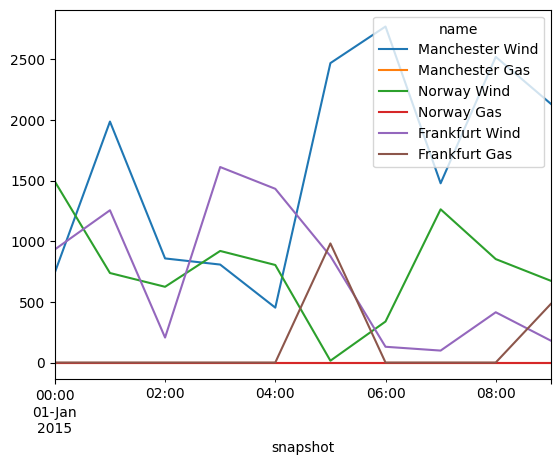

In [46]:
network.generators_t.p.plot()

<Axes: xlabel='snapshot'>

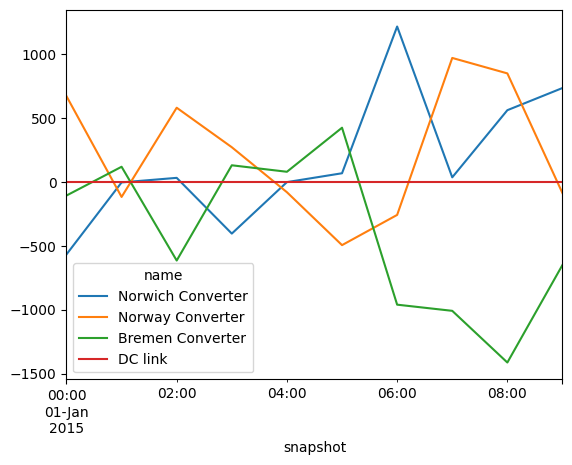

In [47]:
network.links.dynamic.p0.plot()

<Axes: xlabel='snapshot'>

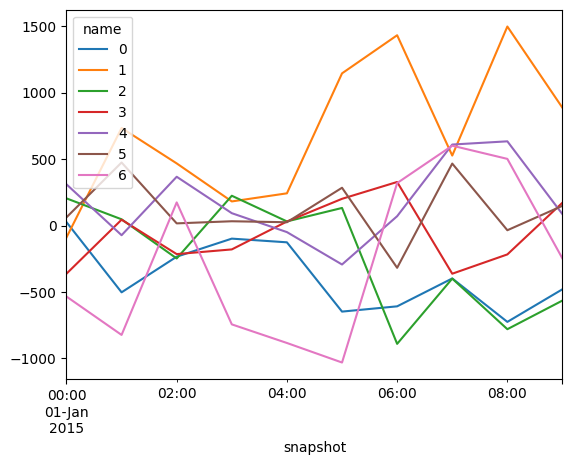

In [48]:
network.lines.dynamic.p0.plot()

Export the results file

In [49]:
file_name_solved_ac_dc = 'solved_ac-dc.xlsx'
network.export_to_excel(file_name_solved_ac_dc)
